# To find total deaths from cases per million due to covid 19

In [384]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
data = pd.read_csv('D:\Rahil_user_backup\Desktop\Python Project\covid19_preprocessed.csv')

In [385]:
data

,Country,TotalCases,TotalDeaths,Recovered,ActiveCases,SeriousCases,CasesPerMil,Population,MedianAge
0,China,80967,3248,71150,6569,2136,56.00,1439323776,38
1,Italy,41035,3405,4440,33190,2498,679.00,60461826,47
2,Spain,19980,1002,1588,17390,939,427.00,46754778,45
3,Iran,19644,1433,5979,12232,0,234.00,83992949,32
4,Germany,16626,44,115,16467,2,198.00,83783942,46
...,...,...,...,...,...,...,...,...,...
177,Nicaragua,1,0,0,1,0,0.20,6624554,26
178,Niger,1,0,0,1,0,0.04,24206644,15
179,St. Vincent Grenadines,1,0,0,1,0,9.00,0,0
180,Sint Maarten,1,0,0,1,0,23.00,42876,0


In [386]:
data.shape

(182, 9)

In [387]:
data.columns

Index(['Country', 'TotalCases', 'TotalDeaths', 'Recovered', 'ActiveCases',
       'SeriousCases', 'CasesPerMil', 'Population', 'MedianAge'],
      dtype='object')

In [388]:
corr = data.corr()          #finding correlation between features/variables
corr.style.background_gradient(cmap='coolwarm')

,TotalCases,TotalDeaths,Recovered,ActiveCases,SeriousCases,CasesPerMil,Population,MedianAge
TotalCases,1.000000,0.922702,0.868131,0.662935,0.863696,0.068885,0.603465,0.167933
TotalDeaths,0.922702,1.000000,0.709297,0.737517,0.924670,0.094088,0.466523,0.142094
Recovered,0.868131,0.709297,1.000000,0.204364,0.640219,0.001253,0.682870,0.065764
ActiveCases,0.662935,0.737517,0.204364,1.000000,0.728273,0.132931,0.163894,0.236506
SeriousCases,0.863696,0.924670,0.640219,0.728273,1.000000,0.097448,0.421844,0.160701
CasesPerMil,0.068885,0.094088,0.001253,0.132931,0.097448,1.000000,-0.049601,-0.208313
Population,0.603465,0.466523,0.682870,0.163894,0.421844,-0.049601,1.000000,0.066495
MedianAge,0.167933,0.142094,0.065764,0.236506,0.160701,-0.208313,0.066495,1.000000


In [389]:
df = pd.DataFrame(data, columns=['CasesPerMil', 'TotalDeaths'])

In [390]:
df.nlargest(n=10, columns='TotalDeaths')

,CasesPerMil,TotalDeaths
1,679.0,3405
0,56.0,3248
3,234.0,1433
2,427.0,1002
6,168.0,372
5,43.0,217
9,48.0,144
7,169.0,94
10,144.0,76
4,198.0,44


In [391]:
print('Total cases per million:',df['CasesPerMil'].sum())
print('Total Deaths:',df['TotalDeaths'].sum())

Total cases per million: 19175.99
Total Deaths: 10405


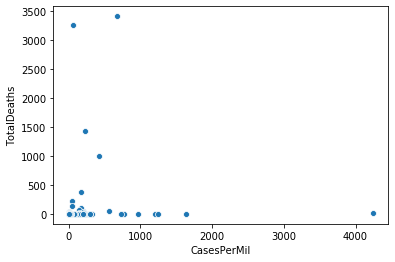

In [392]:
#the data is not in a linear pattern
sns.scatterplot(df['CasesPerMil'], df['TotalDeaths'])

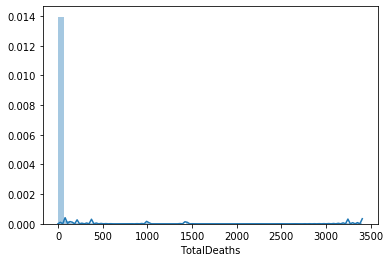

In [393]:
#not a normalized form
sns.distplot(df['TotalDeaths'])

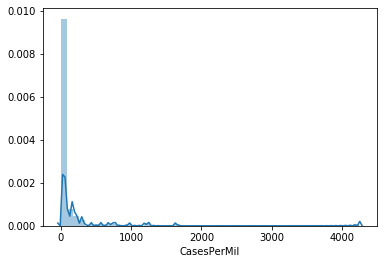

In [394]:
#same case here
sns.distplot(df['CasesPerMil'])

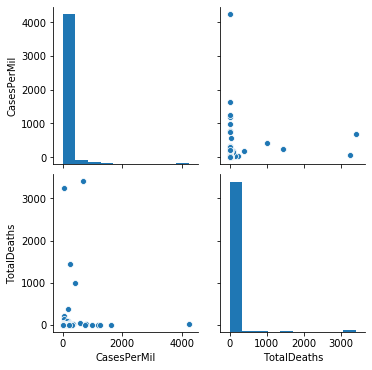

In [395]:
sns.pairplot(df)

In [396]:
#Since the distplot for totaldeaths and casespermil is not normalized, I used normalization
from sklearn import preprocessing          
x_array=np.array(df[['CasesPerMil','TotalDeaths']])
normalized_X=preprocessing.normalize(x_array)

In [397]:
normalized_X[:]

array([[0.01723882, 0.9998514 ],
       [0.19556223, 0.98069129],
       [0.39203475, 0.91995041],
       [0.16115928, 0.98692841],
       [0.97618706, 0.21693046],
       [0.19437721, 0.98092686],
       [0.41158672, 0.9113706 ],
       [0.87391325, 0.48608192],
       [0.99712658, 0.07575343],
       [0.31622777, 0.9486833 ],
       [0.88438475, 0.46675862],
       [0.98247062, 0.1864175 ],
       [0.99970026, 0.02448246],
       [0.9997778 , 0.02107965],
       [0.99709508, 0.07616698],
       [0.99910009, 0.04241463],
       [0.99805258, 0.06237829],
       [0.23560003, 0.97185011],
       [0.97945704, 0.20165292],
       [0.88658485, 0.46256601],
       [0.99789836, 0.06479859],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.3939193 , 0.91914503],
       [0.99964777, 0.02653932],
       [0.99998661, 0.00517457],
       [0.9912279 , 0.13216372],
       [1.        , 0.        ],
       [0.5547002 , 0.83205029],
       [1.

In [398]:
df1 = pd.DataFrame({'CasesPerMil': normalized_X[:,0], 'TotalDeaths': normalized_X[:,1]})

In [399]:
df1

,CasesPerMil,TotalDeaths
0,0.017239,0.999851
1,0.195562,0.980691
2,0.392035,0.919950
3,0.161159,0.986928
4,0.976187,0.216930
...,...,...
177,1.000000,0.000000
178,1.000000,0.000000
179,1.000000,0.000000
180,1.000000,0.000000


In [400]:
df1['CasesPerMil'].describe()

count    182.000000
mean       0.892010
std        0.255205
min        0.000000
25%        0.983753
50%        1.000000
75%        1.000000
max        1.000000
Name: CasesPerMil, dtype: float64

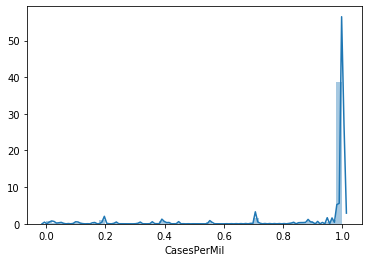

In [401]:
#checking for normalized output
sns.distplot(df1['CasesPerMil'])

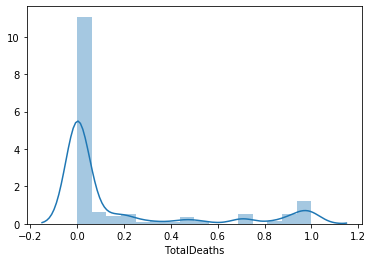

In [402]:
#checking for normalized output
sns.distplot(df1['TotalDeaths'])

In [403]:
X = df1[['CasesPerMil']]
y = df1['TotalDeaths']

In [404]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [405]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [406]:
print(lm.intercept_)

1.2927467733773947


In [407]:
lm.coef_

array([-1.24514003])

In [408]:
predictions = lm.predict(X_test)

In [409]:
print(predictions)

[0.04760674 0.05190776 0.08964897 0.04760674 0.04760674 0.04760674
 0.04840008 0.04760674 0.07178652 1.29274677 0.04760674 0.04760674
 0.04760674 0.73590322 0.04760674 0.04760674 0.04797996 0.04760674
 0.04804532 1.25385513 1.26784895 0.06454821 0.04760674 0.0476929
 0.04760674 0.04760674 0.04760674 0.05003155 0.04760674 0.04760674
 0.04760674 0.04760674 0.04760674 0.41229981 0.04760674 0.04760674
 0.07725719 0.04872725 1.04924441 0.06893327 0.04760674 0.04760674
 0.04760674 0.04761352 0.225048   0.04760674 0.04760674 0.04760674
 0.04760674 0.04760674 0.41229981 0.60206735 0.04760674 0.04760674
 0.04760674]


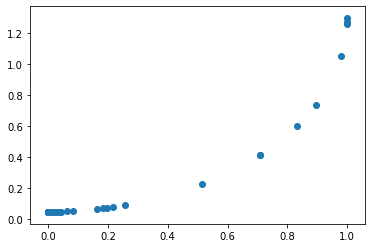

In [410]:
#Is this curve proper for linear regression ???
plt.scatter(y_test, predictions)

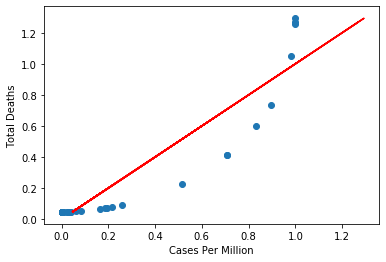

In [411]:
plt.scatter(y_test, predictions)
yhat = X_test.dot(lm.coef_)+lm.intercept_
fig = plt.plot(predictions,yhat,c='red',label='regression line')
plt.xlabel('Cases Per Million')
plt.ylabel('Total Deaths')
plt.show()

In [412]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [413]:
#low accuracy
print('MAE :',metrics.mean_absolute_error(y_test, predictions))
print('MSE :',metrics.mean_squared_error(y_test, predictions))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 0.08285924332252206
MSE : 0.013262202505125482
RMSE : 0.11516163642952232


In [414]:
print('R2 score:',r2_score(y_test,predictions))

R2 score: 0.8671626387027396


In [415]:
metrics.explained_variance_score(y_test, predictions)

0.8685218851053624

In [416]:
cd = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
cd

,Coefficient
CasesPerMil,-1.24514


In [417]:
from sklearn.preprocessing import PolynomialFeatures

In [418]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

lm.fit(X_poly_train, y_train)
y_pred_poly = lm.predict(X_poly_test)

poly_r2 = r2_score(y_test, y_pred_poly)
poly_r2

0.9686586169322072

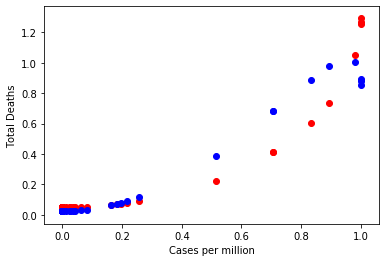

In [419]:
plt.scatter(y_test, predictions, color='r')
plt.scatter(y_test, y_pred_poly, color='b')
plt.xlabel('Cases per million')
plt.ylabel('Total Deaths')
plt.show()

In [420]:
print('MAE :',metrics.mean_absolute_error(y_test, y_pred_poly))
print('MSE :',metrics.mean_squared_error(y_test, y_pred_poly))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

MAE : 0.041203445305944164
MSE : 0.003129057706179766
RMSE : 0.05593798089115986


In [421]:
metrics.explained_variance_score(y_test, y_pred_poly)

0.9688729864669164